In [39]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import os
import numpy as np
import pandas as pd
from glob import glob
from skimage import io 
from matplotlib import pyplot as plt 

# Add working directory here

In [14]:
from sheepfat import pre_processing

# Add data here

In [15]:
import sys
sys.path.append('./data/')
print(sys.path[-1])

./data/


## Choose images
- original
- annotations/label

In [31]:
path_original = './data/images/KW/H&E/inputs/*.tif'
path_labels = './data/images/KW/H&E/masks/*.png'

In [32]:
# original tissue
all_files_images = glob(path_original)

print(len(all_files_images), '\n')
print(*[x.split('/')[-1] for x in np.sort(all_files_images)], sep='\n')  

17 

GTS01.1_OLD_H&E_10x.tif
GTS01.4_OLD_H&E_10x.tif
JTS01.3_FemurTest_H&E-10x.tif
JTS04.3_PCAControl_H&E_10x.tif
S34.3_DC07_H&E_10x_s3.tif
S35.4_SHAM_H&E_10x_s3.tif
S37.3_SHAM_H&E_10x_s2.tif
S41.1_Control_H&E_10x_s2.tif
S42.4_DC04_H&E_10x_s4.tif
S43.4_H&E-Bild-Export-11_s2.tif
S46.3_SHAM_H&E_10x_s2.tif
S47.4_SHAM_H&E_10x.tif
S50.4_SHAM_H&E_10x.tif
S51.1_SHAM_H&E_10x.tif
S53.1_2_SHAM_H&E_10x.tif
UTS01.4_OP_H&E_10x.tif
UTS02.1_OP_H&E_10x.tif


In [33]:
# binary labels
all_files_binary = glob(path_labels)

print(len(all_files_binary), '\n')
print(*[x.split('/')[-1] for x in np.sort(all_files_binary)], sep='\n')

17 

GTS01.1_OLD_H&E_10x.png
GTS01.4_OLD_H&E_10x.png
JTS01.3_FemurTest_H&E-10x.png
JTS04.3_PCAControl_H&E_10x.png
S34.3_DC07_H&E_10x_s3.png
S35.4_SHAM_H&E_10x_s3.png
S37.3_SHAM_H&E_10x_s2.png
S41.1_Control_H&E_10x_s2.png
S42.4_DC04_H&E_10x_s4.png
S43.4_H&E-Bild-Export-11_s2.png
S46.3_SHAM_H&E_10x_s2.png
S47.4_SHAM_H&E_10x.png
S50.4_SHAM_H&E_10x.png
S51.1_SHAM_H&E_10x.png
S53.1_2_SHAM_H&E_10x.png
UTS01.4_OP_H&E_10x.png
UTS02.1_OP_H&E_10x.png


In [34]:
abbrevation = 'S41.1'

path_original = [x for x in np.sort(all_files_images) if abbrevation in x][0]
path_binary = [x for x in np.sort(all_files_binary) if abbrevation in x][0]

print(path_original.split('/')[-4:])
print(path_binary.split('/')[-4:])

['KW', 'H&E', 'inputs', 'S41.1_Control_H&E_10x_s2.tif']
['KW', 'H&E', 'masks', 'S41.1_Control_H&E_10x_s2.png']


# Plot overlay by draw the contorus into the original image

In [35]:
%%time

img_original = io.imread(path_original) # tif.imread(path_original)
print(f'read original image with shape {img_original.shape} from path: {path_original}')

img_binary = io.imread(path_binary) #cv2.imread(path_binary, 0)
print(f'read binary image with shape {img_binary.shape} from path: {path_binary}')

read original image with shape (18997, 9188, 3) from path: ./data/images/KW/H&E/inputs/S41.1_Control_H&E_10x_s2.tif


/home/jpraetor/anaconda3/envs/tf26/lib/python3.7/site-packages/PIL/Image.py:2837: DecompressionBombWarning: Image size (174544436 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


read binary image with shape (18997, 9188) from path: ./data/images/KW/H&E/masks/S41.1_Control_H&E_10x_s2.png
CPU times: user 458 ms, sys: 464 ms, total: 922 ms
Wall time: 6.02 s


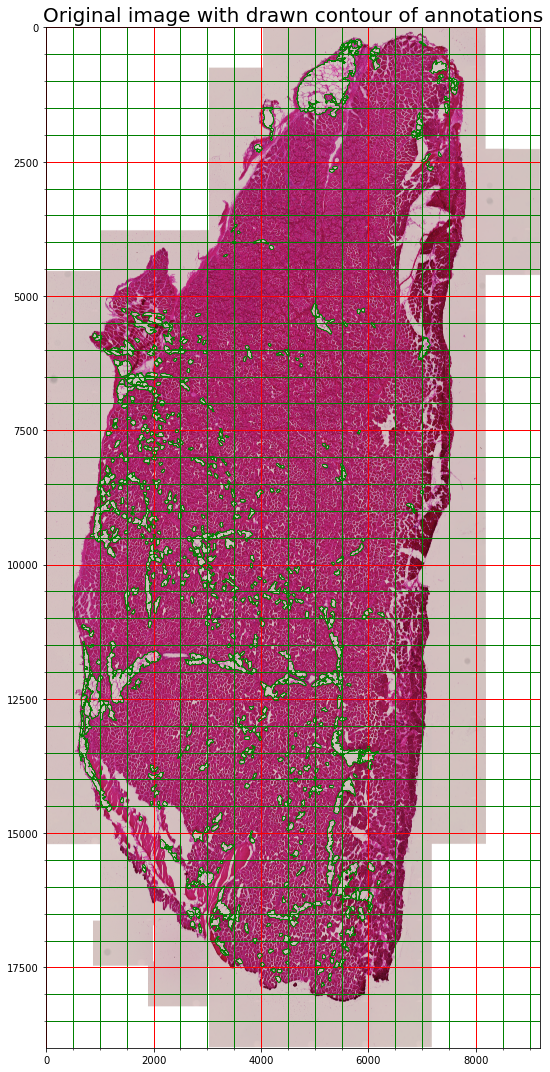

In [36]:
pre_processing.plot(img=img_original, img_binary=img_binary)

# Create cut-outs/subwindows of given  and label
- for a single image
- for all possible original - binary images pairs

In [ ]:
%%time

# for a single image
pre_processing.create_subwindows(path_original=path_original,
                                   path_binary=path_binary, 
                                   output_path='./data/images/KW/H&E/subwindows_512x512/',
                                   window_size=512,
                                   verbose=2)

In [ ]:
%%time

# for all possible original - binary images pairs
for idx, tmp_path_original in enumerate(all_files_images):
    
    tmp_abbreviation = os.path.basename(tmp_path_original).split('.tif')[0]
            
    tmp_path_binary = [x for x in all_files_binary if tmp_abbreviation in x]

    print(f'\n\n[ {idx} / {len(all_files_images)-1} ]\tread input image from path: {tmp_path_original}')

    if len(tmp_path_binary) == 1:
        tmp_path_binary = tmp_path_binary[0]
    else:
        print('could not find abbreviation')
        continue

    print(f'[ {idx} / {len(all_files_images)-1} ]\tread label image from path: {tmp_path_binary}')
    
    pre_processing.create_subwindows(path_original=tmp_path_original,
                                           path_binary=tmp_path_binary,
                                           output_path='./data/images/KW/H&E/subwindows_512x512',
                                           window_size=512,
                                           img_original=None,
                                           img_binary=None,
                                           verbose=2,
                                           var=3000)

    print(f'[ {idx} / {len(all_files_images)-1} ] accomplished image with abbreviation: {tmp_abbreviation}')

# Create cut-outs/subwindows of given input images and 2 binary label images
- for a single image
- for all possible original - binary images pairs

In [ ]:
%%time

# for a single image
pre_processing.create_subwindows_from_union_samples(path_original=path_original,
                                                    path_binary1=path_binary,
                                                    path_binary2=path_binary2,
                                                    output_path='./data/images/KW/H&E/subwindows_512x512/',
                                                    window_size=512,
                                                    verbose=2)

In [ ]:
%%time

# for all possible original - binary images pairs
for idx, tmp_path_original in enumerate(all_files_images):
    
    tmp_abbreviation = os.path.basename(tmp_path_original).split('.tif')[0].split('_')[0]
                
    print(f'\n[ {idx} / {len(all_files_images)-1} ]\tread input image from path: {tmp_path_original} and abbreviation: {tmp_abbreviation}')
        
    tmp_path_binary1 = [x for x in all_files_binary if tmp_abbreviation in x and 'DA' in x][0]
    tmp_path_binary2 = [x for x in all_files_binary if tmp_abbreviation in x and 'KW' in x][0]
        
    if len(tmp_path_binary1) == 0:
        print('could not find <1> abbreviation')
        continue

    if len(tmp_path_binary2) == 0:
        print('could not find <2> abbreviation')
        continue
        
    print(f'[ {idx} / {len(all_files_images)-1} ]\tread <1> label image from path: {tmp_path_binary1}')
    print(f'[ {idx} / {len(all_files_images)-1} ]\tread <2> label image from path: {tmp_path_binary2}')
        
    try:
        
        pre_processing.create_subwindows_from_union_samples(path_original=tmp_path_original,
                                                            path_binary1=tmp_path_binary1,
                                                            path_binary2=tmp_path_binary2,
                                                            output_path='./data/images/KW/H&E/subwindows_512x512/',
                                                            window_size=512,
                                                            verbose=1)
    except:
            print(f'[ {idx} / {len(all_files_images)-1} ] FAIL on image with abbreviation: {tmp_abbreviation}')
            continue
            
    print(f'[ {idx} / {len(all_files_images)-1} ] accomplished image with abbreviation: {tmp_abbreviation}')

# Prepare the table test-data for cross-validation

In [29]:
num_K_folds = 8

In [31]:
all_inputs = glob(path_original)
abbrevations = [os.path.splitext(os.path.basename(x))[0] for x in all_inputs]

# randomly shuffle samples for the test data and split them accordingly to K-fold
np.random.shuffle( abbrevations )

# split sample array in <num_K_folds> sub-arrays
k_fold_abbrevations = np.array_split( abbrevations, indices_or_sections=num_K_folds)

print('[INFO] num_K_folds:', num_K_folds, '\t\tk_fold_abbrevations:\n', k_fold_abbrevations)

[INFO] num_K_folds: 8 		k_fold_abbrevations:
 [array(['S41.1_Control_H&E_10x_s2'], dtype='<U24'), array([], dtype='<U24'), array([], dtype='<U24'), array([], dtype='<U24'), array([], dtype='<U24'), array([], dtype='<U24'), array([], dtype='<U24'), array([], dtype='<U24')]


In [37]:
#df = pd.DataFrame(k_fold_abbrevations)
#df.to_csv('./examples/cross_validation.csv')

df = pd.read_csv('./examples/cross_validation.csv', index_col=0)

df

,0,1,2
0,JTS04.3_PCAControl_H&E_10x,S34.3_DC07_H&E_10x_s3,GTS01.4_OLD_H&E_10x
1,S41.1_Control_H&E_10x_s2,UTS01.4_OP_H&E_10x,NaN
2,S42.4_DC04_H&E_10x_s4,S50.4_SHAM_H&E_10x,NaN
3,S35.4_SHAM_H&E_10x_s3,S37.3_SHAM_H&E_10x_s2,NaN
4,S51.1_SHAM_H&E_10x,S53.1_2_SHAM_H&E_10x,NaN
5,S43.4_H&E-Bild-Export-11_s2,UTS02.1_OP_H&E_10x,NaN
6,GTS01.1_OLD_H&E_10x,S46.3_SHAM_H&E_10x_s2,NaN
7,JTS01.3_FemurTest_H&E-10x,S47.4_SHAM_H&E_10x,NaN


# Create csv files for each k-fold model

In [38]:
path_input = "./data/images/KW/H&E/subwindows_512x512/original/*.tif"
path_label = "./data/images/KW/H&E/subwindows_512x512/labels/*.*"

all_filepath_input = np.sort(glob(path_input))
all_filepath_label = np.sort(glob(path_label))

print(len(all_filepath_input), len(all_filepath_label))

rd_idx = np.random.randint(0, high=len(all_filepath_input))
print('random index:', rd_idx)
print(all_filepath_input[rd_idx])
print(all_filepath_label[rd_idx])

1629 1629
random index: 792
./data/images/KW/H&E/subwindows_512x512/original/0792_S35.4_SHAM_H&E_10x_s3_walluks.tif
./data/images/KW/H&E/subwindows_512x512/labels/0792_S35.4_SHAM_H&E_10x_s3_walluks_mask.png


In [ ]:
# iterate over all model (k-folds)
for model_id, row in df.iterrows():
       
    sub_filepath_input_test = []
    sub_filepath_label_test = []
       
    # extract the test data
    for sample_name in row:
        
        if pd.isna(sample_name):
            print(f'\skip: sample_name')
            continue
        
        # for mixed data sets
        sample_name = sample_name.split('_')[0]
        #print(sample_name)        
        
        # just select the first n-th chars       
        sub_filepath_input_test += [x for x in all_filepath_input if sample_name in x]
        sub_filepath_label_test += [x for x in all_filepath_label if sample_name in x]
       
    # extract the training data by take the complementary subset 
    sub_filepath_input_training = [x for x in all_filepath_input if x not in sub_filepath_input_test]
    sub_filepath_label_training = [x for x in all_filepath_label if x not in sub_filepath_label_test]
           
    print(f'\nmodel-id: <{model_id}> - samples: {list(row)}')
    
    print(f'\t#-training-input: {len(sub_filepath_input_training)} - #-training-label: {len(sub_filepath_label_training)}')

    rd_idx_training = np.random.randint(0, high=len(sub_filepath_input_training))
    
    print(f'\trandom index: {rd_idx_training}')
    print(f'\tinput_training: {sub_filepath_input_training[rd_idx_training][30:]}')
    print(f'\tlabel_training: {sub_filepath_label_training[rd_idx_training][30:]}')   
    
    print(f'\t#-training-input: {len(sub_filepath_input_test)} - #-training-label: {len(sub_filepath_label_test)}')

    rd_idx_test = np.random.randint(0, high=len(sub_filepath_input_test))
    
    print(f'\trandom index: {rd_idx_test}')
    print(f'\tinput_training: {sub_filepath_input_test[rd_idx_test][30:]}')
    print(f'\tlabel_training: {sub_filepath_label_test[rd_idx_test][30:]}')
    
    df_training = pd.DataFrame(np.array([sub_filepath_input_training, sub_filepath_label_training]).T, 
                               columns=['input', 'label'])
    df_test = pd.DataFrame(np.array([sub_filepath_input_test, sub_filepath_label_test]).T, 
                               columns=['input', 'label'])    
    
    save_path_training = os.path.join('./examples/KW/', f'modelID_{model_id}_training_data.csv')
    save_path_test = os.path.join('./examples/KW/', f'modelID_{model_id}_test_data.csv')
    
    df_training.to_csv(save_path_training)
    df_test.to_csv(save_path_test)
    
    print(save_path_training)
    print(save_path_test)

# Draw mask / binaryized probability mask with outline of the whole tissue

read tissue mask with shape (18997, 9188) from path: /asbdata/Philipp/SheepFat/images_v2_Kassa/H&E/tisse_mask/S41.1_Control_H&E_10x_s2.png
read binary image with shape (14112, 6566, 3) from path: /asbdata/Philipp/SheepFat/images_v2_Kassa/OilRed/inputs/S41.1_Control_OilRed_10x_s2_walluks_.tif


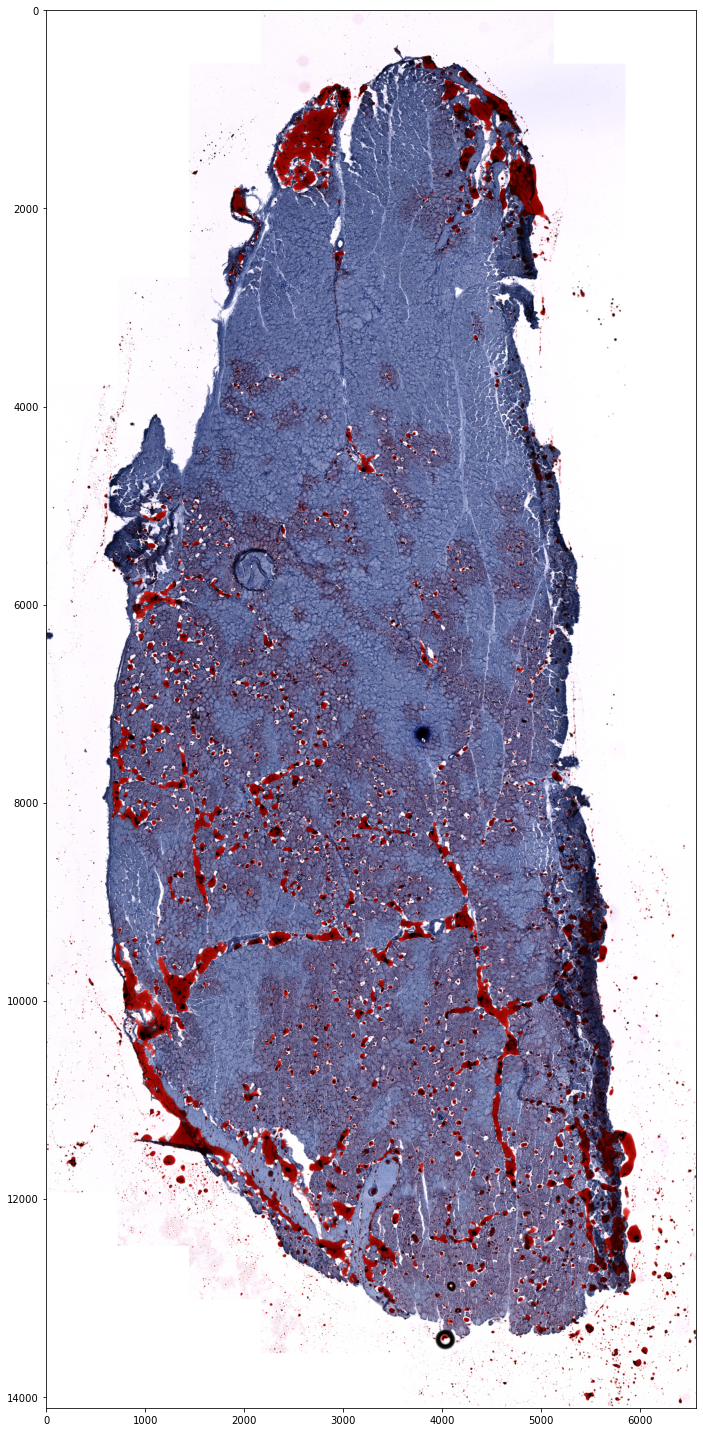

CPU times: user 49.4 s, sys: 4.67 s, total: 54.1 s
Wall time: 16.3 s


In [13]:
%%time

# tissue mask
path_original_mask = './data/images/tisse_mask/H&E/KW-manual-annotation/S41.1_Control_H&E_10x_s2.png'
img_tissue_mask = cv2.imread(path_original_mask, 0)
print(f'read tissue mask with shape {img_tissue_mask.shape} from path: {path_original_mask}')

# image to override (original, annotation, prediction)
path_override = './data/images/KW/OilRed/inputs/S41.1_Control_OilRed_10x_s2_walluks_.tif' # OilRed

img_override = cv2.imread(path_override, 1)
print(f'read binary image with shape {img_override.shape} from path: {path_override}')

img_override = cv2.cvtColor(img_override, cv2.COLOR_BGR2RGB)

fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10, 20))

ax1.imshow(img_override)
plt.tight_layout()
plt.show()